# Лабораторная работа №6

## Численный поиск экстремума функции многих переменных

### Задание 1

*Найти точку максимума функции $f(x_1, x_2) =(x_1-1)^2+2\cdot x_2^2; [x_1^0= 1, x_2^0= 2]$ градиентным
методом с дроблением шага.$(x_1^0,x_2^0)$-начальная точка. Построить график функции В окрестности точки максимума оценить овражность, построить
линии уровня и траекторию поиска.*

Большинство процессов, используемых для приближенного нахожения экстремума можно представить как итерационные в виде $x^{k+1} = x^k + α^kp^k$, где $p^k$- вектор, определяющий направление движения от точки $x^k$ к точке $x^{k+1}$, $α^k$ - числовой множитель, величина которого задаетдлину шага в направлении $p^k$.

Простейшими методами первого порядка являются одношаговые методы спуска, в которых на каждом шаге вектор $p^k$ совпадает с направлением антиградиента функции $f(x)$: $p^k=-\nabla f(x^k)$:

В врадиентном методе с дроблением шага параметром а являются величины $\alpha > 0$ и $\lambda ∈ (0, 1)$. . Параметр $\lambda$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех итераций.



Выбор $\alpha^k$ происходит следующим образом. Положив сначала $\bar{a} = \alpha$, проверим неравенство $f(x^k + \bar{a}\cdot p^k) < f(x^k)$.Если оно выполнено, то берем $\alpha^k = \bar{a}$. В противном случае значение $\bar{a}$ изменяем, домножив его на $\lambda$ (дробление $\bar{a}$). Снова проверяем неравенство. И так до тех пор, пока неравенство  не выполнится. То значение
$\bar{a}$, при котором это произойдет впервые, и выбираем в качестве $\alpha^k$


In [2]:
import numpy as np
from scipy import *
from scipy.linalg import *
from math import log, exp,sin
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab
% matplotlib inline

*График функции*

In [19]:
def F (x): # х - вектор (список)
    z=(x[0]-1)**2+x[1]**2+3
    return z

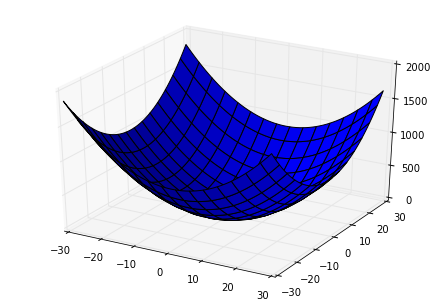

In [20]:
x = np.arange (-30, 30, 1)
y = np.arange (-30, 30, 1)
xg, yg,=np.meshgrid(x, y)
z =F(np.meshgrid(x, y))
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xg, yg, z,rstride=4, cstride=4)
pylab.show()

In [24]:
def M (x,e): # х - вектор список
    X=np.array(x,dtype=np.double) # для траектории поиска
    x=np.array(x,dtype=np.double) # из списка делаем массив
    t=0.5
    while True:
        n=0
        a=1 #начальное значение шага
        q=2*(x[0]-1) #производная по x в точке x0
        r=4*x[1]     #производная по y в точке y0
        g=[q,r]      
        g=np.array(g,dtype=np.double)  # из списка делаем массив
        #print(abs(F((x-a*g))-F((x))))
        while  F((x-a*g))>F((x)) or n!=2: 
            n=n+1      # на случай если условие будет выполянться бесконечно долго
            a=a*t
        x2=x-a*g        # идем в наравление антиградиента
        if norm(F(x)-F(x2))<e: # услвоие выхода из основного цикла
            break
        X=np.row_stack((X, x2))  # добовлятся строка   к массиву
        x=x2 
    return X
A=M([3,5],0.01)
print(" ")
print(A)    

 
[[ 3.      5.    ]
 [ 2.      0.    ]
 [ 1.5     0.    ]
 [ 1.25    0.    ]
 [ 1.125   0.    ]
 [ 1.0625  0.    ]]


*Построение линий уровня и траектории поиска*

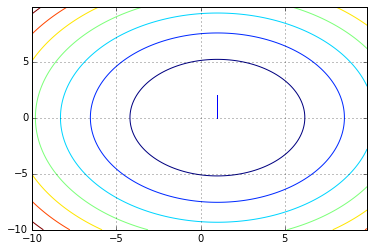

In [6]:
x = np.arange (-10, 10, 0.1)
y = np.arange (-10, 10, 0.1)
xg, yg = np.meshgrid(x, y)
z =F(np.meshgrid(x, y))
pylab.contour(xg, yg, z)
pylab.plot(A[:,0] ,A[:,1])
pylab.grid(True)
pylab.show()

*Оценим овражность*

In [7]:
H=np.array(([2,0],[0,2])) # посчитали аналитически
print("Матрица Гессе:")
print(H)
S=eigvals(H) 
print("Собственные значения")
print(S)
print("Овражность")
print(max(S)/min(S))

Матрица Гессе:
[[2 0]
 [0 2]]
Собственные значения
[ 2.+0.j  2.+0.j]
Овражность
(1+0j)
